In [95]:
import libpysal
import geopandas as gpd
import numpy as np
import libpysal
from scipy.spatial.distance import cdist
from scipy.spatial import distance_matrix
import shapely
import pandas as pd
from libpysal.cg import KDTree
from libpysal.weights import KNN
import esda
from matplotlib import pyplot as plt

import os
import numpy as np
import pandas as pd
# import scipy as sp
from scipy import stats as sps
import pointpats as pp
from shapely.geometry import Polygon, Point, MultiPoint
import leafmap

In [150]:
## I/O

lakes_gdf = gpd.read_file('/mnt/g/Ch4/misc/WBD_sample.shp').to_crs("ESRI:102001")

In [151]:
## View
m = leafmap.Map(google_map='SATELLITE')
m.add_gdf(lakes_gdf, fill_colors=['red'])
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [222]:
## loop
for i, feature in enumerate(lakes_gdf.loc[:, 'geometry']): # 0:4
    rand_pts = pp.random.poisson(feature, size=30)
    rand_pts_geom = [Point(pt) for pt in rand_pts]
    # random_pts_gdf = gpd.GeoDataFrame(geometry = [Point(pt) for pt in random_pts], crs=lakes_gdf.crs)
    rand_pts_gs = gpd.GeoSeries([Point(pt) for pt in rand_pts], crs=lakes_gdf.crs)
    lakes_gdf.loc[i, 'mean_dist2shore'] = rand_pts_gs.distance(feature.boundary).mean()
    # rand_pts_dist = gpd.

# pp.random.poisson(shp.loc[0, 'geometry'], size=30)
# shp.loc[0, 'geometry']

lakes_gdf.head()

,OBJECTID,ID,GRIDCODE,Area,SI,Shape_Leng,Shape_Area,PA,PA_Circle,Perimeter,river,on_glacier,geometry,mean_dist2shore
0,318312.0,883539.0,1.0,0.035178,1.115111,0.008823,4.540358e-06,21.076057,18.900415,0.741407,None,None,"POLYGON ((606034.179 1256955.080, 606029.835 1...",31.008030
1,318452.0,884210.0,1.0,0.002896,1.281111,0.003251,3.736590e-07,84.396667,65.877731,0.244376,None,None,"POLYGON ((609803.427 1256749.361, 609712.381 1...",8.761459
2,318470.0,884329.0,1.0,0.019256,2.054513,0.012196,2.484794e-06,52.485142,25.546265,1.010628,None,None,"POLYGON ((610127.148 1256791.776, 610141.427 1...",10.557570
3,318699.0,885767.0,1.0,2.879962,2.544130,0.186279,3.716075e-04,5.314359,2.088871,15.305153,None,None,"POLYGON ((607603.646 1255653.473, 607617.933 1...",151.404721


In [220]:
feature.boundary.distance(rand_pts_geom[20]) #, align=False)
# help(feature.distance)
# gpd.GeoSeries.distance
# lakes_gdf.loc[0:1, 'geometry'].boundary.distance(rand_pts_gs[1:5], align=False)
type(lakes_gdf.loc[0:1, 'geometry'])
type(lakes_gdf.loc[1, 'geometry'])
type(lakes_gdf.iloc[1, :])
type(lakes_gdf.iloc[0:1, :])
# lakes_gdf.loc[1, 'geometry']
rand_pts_gs.distance(feature.boundary) # <<<< THIS IS IT!
rand_pts_gs.distance(feature.boundary).mean()

36.017324279898084

In [159]:
pts_gdf = gpd.GeoDataFrame(geometry = [Point(pt) for pt in rand_pts], crs=lakes_gdf.crs)
m.add_gdf(lakes_gdf)
m.add_gdf(pts_gdf)
m

Map(bottom=11220627.369628906, center=[51.087303621960494, -87.2503709793091], controls=(ZoomControl(options=[…

<AxesSubplot:>

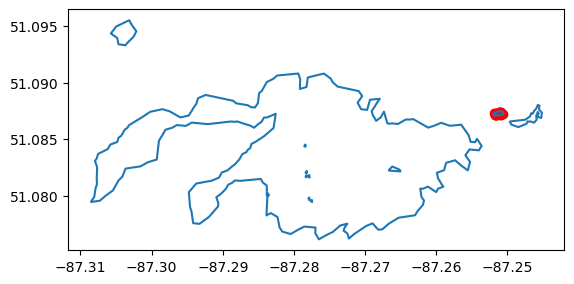

In [118]:
## Alt plot
%matplotlib inline
fig, ax = plt.subplots()
lakes_gdf.boundary.plot(ax=ax)
pts_gdf.plot(c='red', ax=ax)

## Testing examples

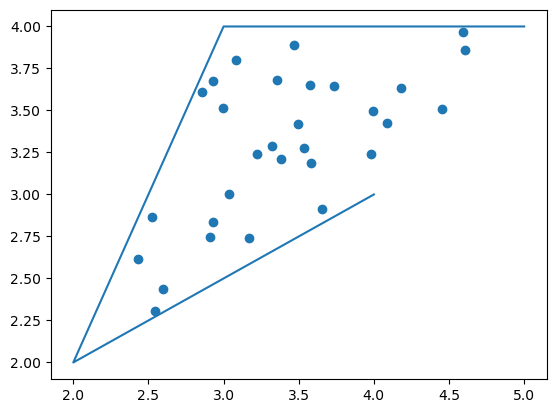

In [67]:
## Pointpats random points generation
## https://stackoverflow.com/questions/56393503/how-can-i-generate-random-coordinates-inside-a-polygon

 
# Coordinates of polygon edges
coords = [[5,4],[3,4], [2,2],[4,3]]
point1 = Point([3,3])
point2 = Point([0,4])
pgon = Polygon(coords)

# Generates 5 points inside polygon
random_pts = pp.random.poisson(pgon, size=30)

## View
coords_np = np.array(coords)
plt.plot(coords_np[:,0], coords_np[:,1])
plt.scatter(random_pts[:,0], random_pts[:,1])

In [68]:
## Calc distance from point to poly
from libpysal.cg import get_polygon_point_dist
get_polygon_point_dist(pgon, point1)

AttributeError: 'Polygon' object has no attribute 'bounding_box'

In [117]:
dir(pointpats)

['HexagonM',
 'PointPattern',
 'PointProcess',
 'PoissonClusterPointProcess',
 'PoissonPointProcess',
 'QStatistic',
 'RectangleM',
 'SpaceTimeEvents',
 'Window',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_circle',
 '_deprecated_distance_statistics',
 'as_window',
 'centrography',
 'distance_statistics',
 'dtot',
 'ellipse',
 'euclidean_median',
 'f',
 'f_test',
 'g',
 'g_test',
 'geometry',
 'hull',
 'j',
 'j_test',
 'jacquez',
 'k',
 'k_test',
 'knox',
 'l',
 'l_test',
 'manhattan_median',
 'mantel',
 'mbr',
 'mean_center',
 'minimum_bounding_rectangle',
 'minimum_rotated_rectangle',
 'modified_knox',
 'pointpattern',
 'poly_from_bbox',
 'process',
 'quadrat_statistics',
 'random',
 'skyum',
 'spacetime',
 'std_distance',
 'to_ccf',
 'util',
 'weighted_mean_center',
 'window']